11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.3800 - val_loss: 0.1865
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1783 - val_loss: 0.1542
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1499 - val_loss: 0.1346
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1324 - val_loss: 0.1216
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1206 - val_loss: 0.1130
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1125 - val_loss: 0.1072
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1074 - val_loss: 0.1030
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1033 - val_loss: 0.0997
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1003 - val_loss: 0.0971
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0979 - val_loss: 0.0954
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

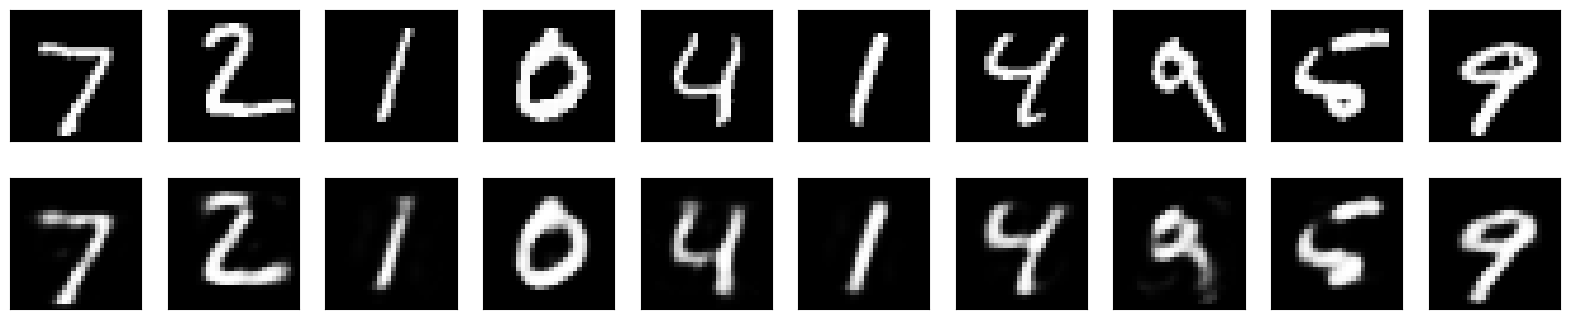

In [1]:
#Auto-Encoder

################################Normal Auto-encoder################################

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images from 28x28 to 784-dimensional vectors
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

# Define the autoencoder model
input_dim = 28 * 28
encoding_dim = 32  # Dimension of the encoding

# Input layer
input_img = layers.Input(shape=(input_dim,))

# Encoding layer
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# Decoding layer
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = models.Model(input_img, decoded)

# Define the encoder model (for visualization or further usage)
encoder = models.Model(input_img, encoded)

# Define the decoder model
encoded_input = layers.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = models.Model(encoded_input, decoder_layer(encoded_input))

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Display some results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()